In [1]:
# Import libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Cleaning and Preprocessing

In [2]:
# Read dataset, drop missing values
df = pd.read_csv('data.csv')
df.dropna()
df = df.drop(columns=['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
    'fractal_dimension_se', 'Unnamed: 32'])
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [3]:
# Selected column names for encoding an scaling
target_column = 'diagnosis'
numerical_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer

# Initialize encoder, scaler, and normalizer
encoder = LabelEncoder()
scaler = StandardScaler()
normalizer = Normalizer()

# Encode the target column
df[target_column] = encoder.fit_transform(df[target_column])

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Normalize the numerical columns to be between 0 and 1
df[numerical_columns] = normalizer.fit_transform(df[numerical_columns])

In [4]:
# Output the transformed data to .csv
df.to_csv('data_refined.csv', index = False)

Data Visualization

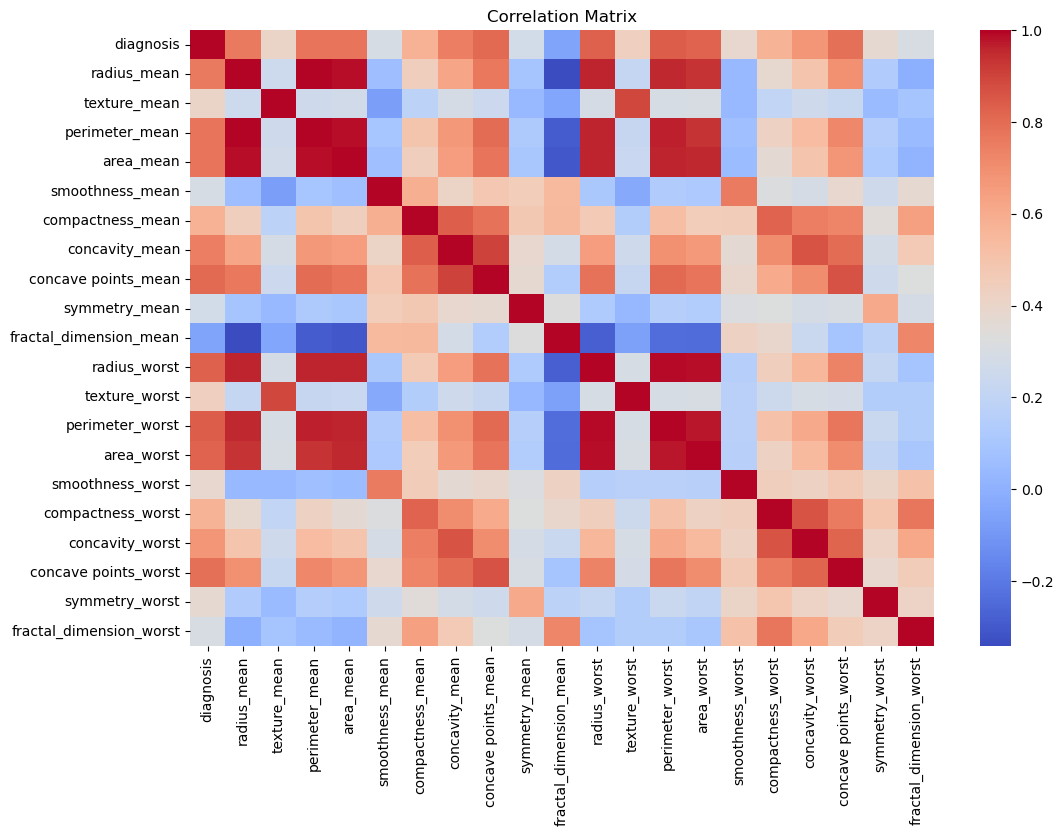

In [5]:
# Correlation matrix
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

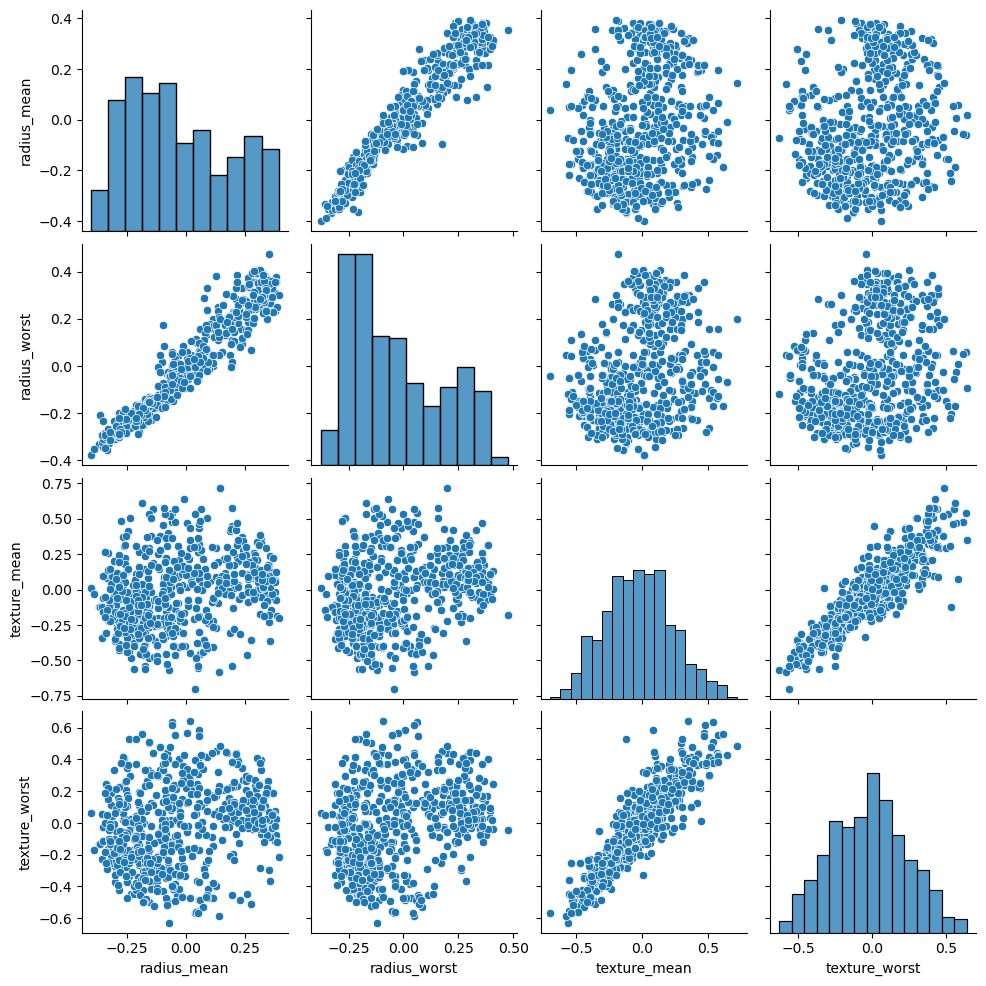

In [6]:
# Pair plots
selected_features = ['radius_mean', 'radius_worst', 'texture_mean', 'texture_worst' ]
sns.pairplot(df[selected_features])
plt.show()

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

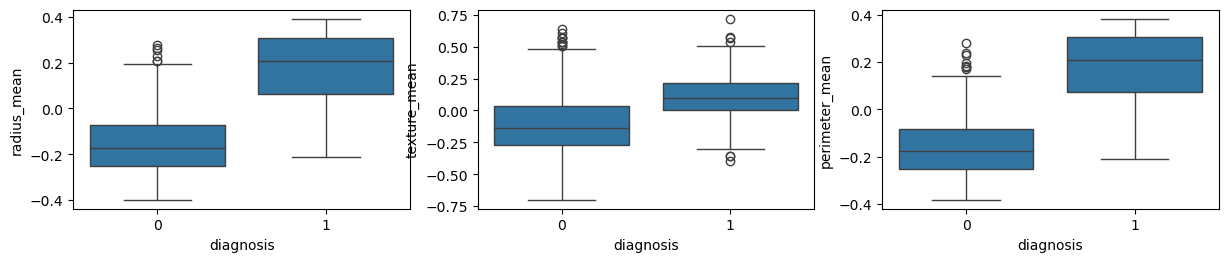

In [7]:
# Box plots
plt.figure(figsize = (20, 15))
plt.subplot(5, 4, 1)
sns.boxplot(data = df, x = 'diagnosis', y = 'radius_mean')
plt.subplot(5, 4, 2)
sns.boxplot(data = df, x = 'diagnosis', y = 'texture_mean')
plt.subplot(5, 4, 3)
sns.boxplot(data = df, x = 'diagnosis', y = 'perimeter_mean')

<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

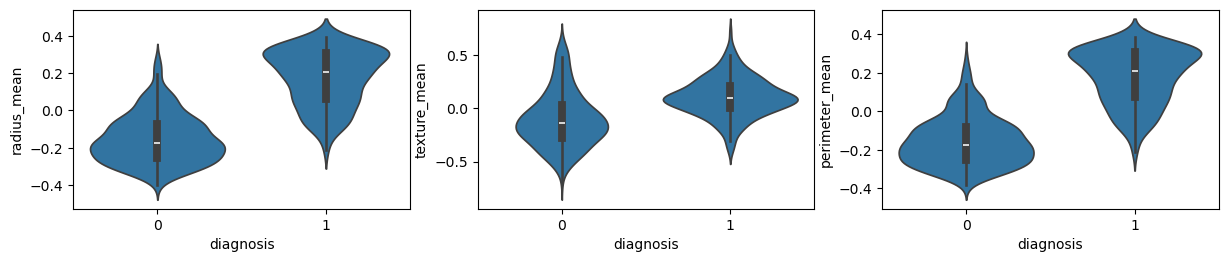

In [8]:
# Violin plots
plt.figure(figsize = (20, 15))
plt.subplot(5, 4, 1)
sns.violinplot(data = df, x = 'diagnosis', y = 'radius_mean')
plt.subplot(5, 4, 2)
sns.violinplot(data = df, x = 'diagnosis', y = 'texture_mean')
plt.subplot(5, 4, 3)
sns.violinplot(data = df, x = 'diagnosis', y = 'perimeter_mean')

In [9]:
# For my model, I'll check to see whats most correlated with diagnosis
corr = df.corr()
row = corr.iloc[0].sort_values(ascending=False)
print(row)

diagnosis                  1.000000
perimeter_worst            0.840955
radius_worst               0.830065
area_worst                 0.824922
concave points_mean        0.810138
concave points_worst       0.788337
perimeter_mean             0.777267
area_mean                  0.774944
radius_mean                0.760103
concavity_mean             0.745758
concavity_worst            0.677547
compactness_mean           0.577719
compactness_worst          0.573979
texture_worst              0.434337
texture_mean               0.403067
smoothness_worst           0.384602
symmetry_worst             0.371397
fractal_dimension_worst    0.298121
smoothness_mean            0.293661
symmetry_mean              0.276492
fractal_dimension_mean    -0.048344
Name: diagnosis, dtype: float64


In [10]:
# For now drop anything below 0.30 positive correlation
df = df.drop(columns = ['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'fractal_dimension_worst'])
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [11]:
# Split the data into sets for our models
from sklearn.model_selection import train_test_split

X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]
y = df['diagnosis']

# First get our training sets and set aside 20% for test and validaiton
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20)

# Split temp sets into 2
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50)

In [12]:
# Import our models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

KNN Classifier

In [13]:
# Try KNN as our first model
results = {}

for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    results[k] = knn.score(X_val, y_val)

In [14]:
best_k = max(results, key = results.get)
score = results[best_k]

print(f"The best n_neighbors is {best_k}, with an accuracy of {score}")

The best n_neighbors is 1, with an accuracy of 1.0


In [15]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.9824561403508771


Random Forest Classifier

In [16]:
# Tuning multiple hyperparams, so I use gridsearch to test the two along with cross validation
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()
param_grid = {
    "n_estimators" : list(range(1, 51, 1)),
    "criterion" : ["gini", "entropy", "log_loss"]
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print(f"Using GridSearch, the best params are {grid_search.best_params_}, with a best CV accuracy of {grid_search.best_score_}")


Using GridSearch, the best params are {'criterion': 'entropy', 'n_estimators': 49}, with a best CV accuracy of 0.9626373626373625


In [17]:
# Build out final model on our test data
rf_model = RandomForestClassifier(n_estimators=grid_search.best_params_["n_estimators"], criterion=grid_search.best_params_["criterion"])
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(rf_model.score(X_test, y_test))

0.9824561403508771


Support Vector Classifier

In [20]:
# Tuning multiple hyperparams, so I use gridsearch to test the two along with cross validation
from sklearn.model_selection import GridSearchCV
svc = SVC()
param_grid = {
    "C" : [0.5, 1.0],
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "gamma" : ["scale", "auto"]
}

grid_search = GridSearchCV(svc, param_grid=param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print(f"Using GridSearch, the best params are {grid_search.best_params_}, with a best CV accuracy of {grid_search.best_score_}")


Using GridSearch, the best params are {'C': 0.5, 'gamma': 'scale', 'kernel': 'sigmoid'}, with a best CV accuracy of 0.9692307692307693


In [21]:
svc = SVC(C = 0.5, gamma = "scale", kernel = "sigmoid")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))

0.9824561403508771
